In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
list(digits.keys())

['data', 'target', 'target_names', 'images', 'DESCR']

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
x, y = digits.data, digits.target

print("data shape: %r, target shape: %r" % (x.shape, y.shape))
print("classes: %r" % list(np.unique(y)))

data shape: (1797, 64), target shape: (1797,)
classes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
n_samples, n_features = x.shape
print("n_samples = %d" % n_samples)
print("n_features = %d" % n_features)

n_samples = 1797
n_features = 64


In [6]:
def plot_gallery(data, labels, shape, interpolation="nearest"):
    for i in range(data.shape[0]):
        plt.subplot(1, data.shape[0], (i+1))
        plt.imshow(data[i].reshape(shape), interpolation=interpolation,
                  cmap="binary")
        plt.title(labels[i])
        plt.xticks([]); plt.yticks([])

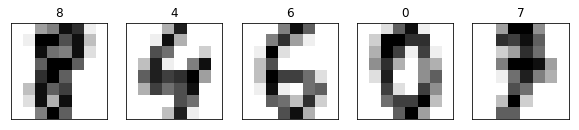

In [7]:
subsample = np.random.permutation(x.shape[0])[:5]
images = x[subsample]
labels = y[subsample]
plot_gallery(images, labels, shape=(8,8))

In [8]:
from sklearn.decomposition import RandomizedPCA

pca = RandomizedPCA(n_components=2)
x_pca = pca.fit_transform(x)
x_pca.shape

C:\Python36\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(1797, 2)

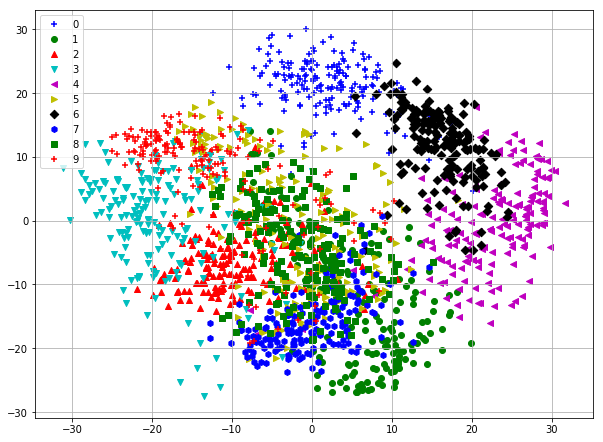

In [9]:
from itertools import cycle
markers = ['+', 'o', '^', 'v', '<', '>', 'D', 'h', 's']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, j, k in zip(np.unique(y), cycle(markers), cycle(colors)):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i,  1], c=k, marker=j,
               label=i)
    
plt.legend(loc="best")

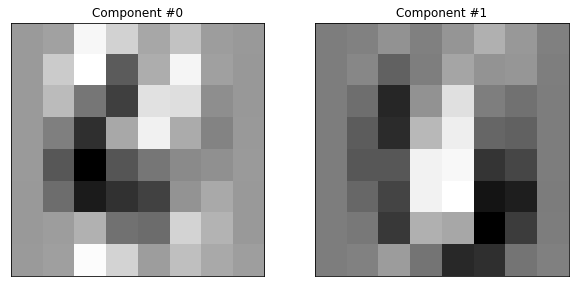

In [10]:
labels = ["Component #%d" % i for i in range(len(pca.components_))]
plot_gallery(pca.components_, labels, shape=(8,8))

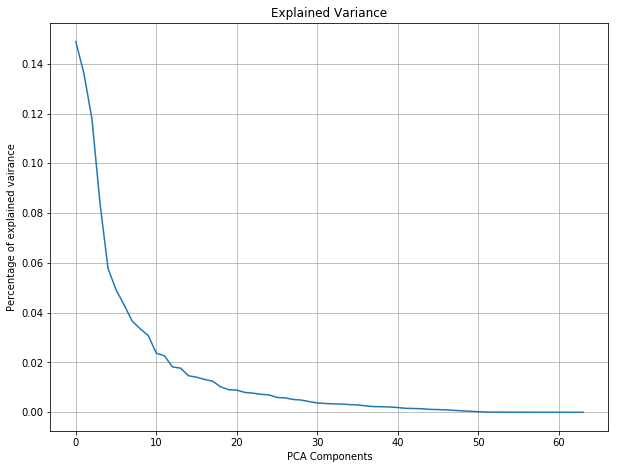

In [11]:
from sklearn.decomposition import PCA

pca_big = PCA().fit(x, y)
plt.title("Explained Variance")
plt.ylabel("Percentage of explained vairance")
plt.xlabel("PCA Components")
plt.plot(pca_big.explained_variance_ratio_)

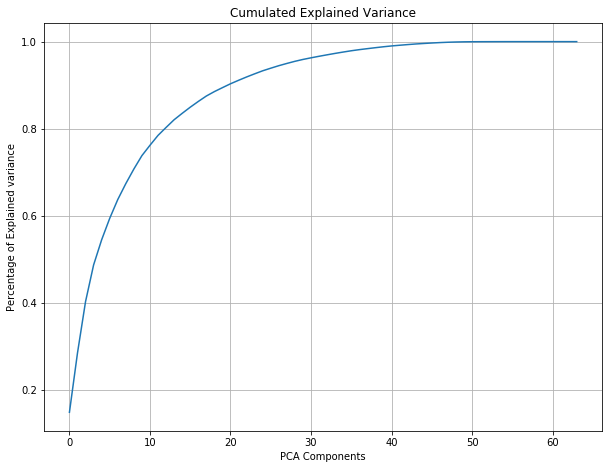

In [12]:
plt.title("Cumulated Explained Variance")
plt.xlabel("PCA Components")
plt.ylabel("Percentage of Explained variance")
plt.plot(np.cumsum(pca_big.explained_variance_ratio_))

In [13]:
from sklearn.svm import SVC

SVC().fit(x,y).score(x,y)

1.0

In [14]:
from sklearn.cross_validation import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0,
                                                    test_size=.25)

C:\Python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
svc = SVC(kernel="rbf").fit(x_train, y_train)
train_score = svc.score(x_train,y_train)
train_score

1.0

In [16]:
test_score = svc.score(x_test, y_test)
test_score

0.48666666666666669

In [17]:
svc_2 = SVC(kernel="rbf", C=100, gamma=.001).fit(x_train, y_train)
svc.score(x_train, y_train)

1.0

In [18]:
svc_2.score(x_test, y_test)

0.99333333333333329

In [19]:
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(n_samples, n_iter=3, test_size= .1, 
                 random_state=0)
for cv_index, (train, test) in enumerate(cv):
    print("# Cross Vliidation Iteration #{}".format(cv_index))
    print("test inndices: {}...".format(train[:10]))
    print("train indices: {}...".format(test[:10]))
    print("train score: {}, test score: {}".format(svc.score(x[train], y[train]), 
                                                  svc.score(x[test], y[test])))
    

# Cross Vliidation Iteration #0
test inndices: [ 353    5   58 1349 1025  575 1074 1110 1745  689]...
train indices: [1081 1707  927  713  262  182  303  895  933 1266]...
train score: 0.9177489177489178, test score: 0.45555555555555555
# Cross Vliidation Iteration #1
test inndices: [1336  608  977   22  526 1587 1130  569 1481  962]...
train indices: [1014  755 1633  117  181  501  948 1076   45  659]...
train score: 0.8688930117501547, test score: 0.8944444444444445
# Cross Vliidation Iteration #2
test inndices: [ 451  409  911 1551  133  691 1306  111  852  825]...
train indices: [ 795  697  655  573  412  743  635  851 1466 1383]...
train score: 0.8664192949907236, test score: 0.9166666666666666


In [20]:
from sklearn.cross_validation import cross_val_score

svc = SVC(kernel="rbf", C=1, gamma=.001)
cv = ShuffleSplit(n_samples, n_iter=10, test_size=.1, random_state=0)

test_scores = cross_val_score(svc, x, y, cv=cv, n_jobs=2)
test_scores

array([ 0.98888889,  0.99444444,  0.99444444,  0.99444444,  0.99444444,
        0.99444444,  0.98888889,  0.99444444,  0.98888889,  1.        ])

In [21]:
from scipy.stats import sem

def mean_score(scores):
    return ("Mean score: {:.3f} (+/-{:.3f})").format(
    np.mean(scores), 2*sem(scores))

In [22]:
print(mean_score(test_scores))

Mean score: 0.993 (+/-0.002)


In [23]:
n_samples = x[np.random.randint(0,1797, 1000)].shape[0]
svc = SVC(C=1, gamma=.01)
cv = ShuffleSplit(n_samples, n_iter=50, random_state=0, test_size=.5)

test_scores = cross_val_score(svc, x, y, cv=cv, n_jobs=2) 
test_scores

array([ 0.512,  0.458,  0.432,  0.598,  0.554,  0.536,  0.542,  0.518,
        0.576,  0.268,  0.354,  0.6  ,  0.496,  0.35 ,  0.548,  0.438,
        0.502,  0.526,  0.352,  0.406,  0.642,  0.76 ,  0.484,  0.648,
        0.5  ,  0.44 ,  0.636,  0.332,  0.618,  0.54 ,  0.53 ,  0.636,
        0.578,  0.538,  0.61 ,  0.538,  0.608,  0.608,  0.406,  0.556,
        0.476,  0.468,  0.468,  0.396,  0.478,  0.566,  0.524,  0.576,
        0.292,  0.512])

In [24]:
n_samples = x[np.random.randint(0,1797, 1000)].shape[0]
svc = SVC(C=10, gamma=.005)
cv = ShuffleSplit(n_samples, n_iter=50, random_state=0, test_size=.5)

test_scores = cross_val_score(svc, x, y, cv=cv, n_jobs=2) 
test_scores
mean_score(test_scores)

'Mean score: 0.945 (+/-0.006)'

In [25]:
n_gammas = 10
n_iter = 5
cv = ShuffleSplit(n_samples, n_iter=n_iter, train_size=500, 
                 test_size=500, random_state=0)

train_scores = np.zeros((n_gammas, n_iter))
test_scores = np.zeros((n_gammas, n_iter))

gammas = np.logspace(-7,-1,n_gammas)

for i, gamma in enumerate(gammas):
    for j, (train, test) in enumerate(cv):
        clf = SVC(gamma=gamma, C=10).fit(x[train], y[train])
        train_scores[i,j] = clf.score(x[train], y[train])
        test_scores[i,j] = clf.score(x[test], y[test])

Text(0.5,0,'gamma')

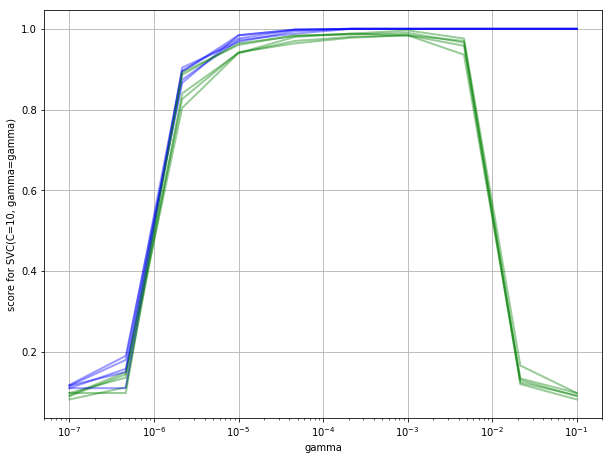

In [26]:
def plot_validation_curves(param_values, train_scores, test_scores):
    for i in range(train_scores.shape[1]):
        plt.semilogx(param_values, train_scores[:, i], alpha=.4, lw=2, c="b")
        plt.semilogx(param_values, test_scores[:, i], alpha=.4, lw=2, c="g")

plot_validation_curves(gammas, train_scores, test_scores)
plt.ylabel("score for SVC(C=10, gamma=gamma)")        
plt.xlabel("gamma")